In [2]:
%matplotlib inline

In [3]:
import numpy as np
from scipy.integrate import odeint
import random as rand
import matplotlib.pyplot as plt

# Is it chaos?
There's a [famous theorem](https://en.wikipedia.org/wiki/Poincar%C3%A9%E2%80%93Bendixson_theorem) in dynamical systems which states that "chaotic" dynamics requires a system with at least three variables. But consider the following ordinary differential equations:
$$\frac{dx}{dt} = \frac{xy}{x^2 + y^2} - \alpha x$$
$$\frac{dy}{dt} = \frac{y^2}{x^2 + y^2} - \beta (y - 1) - 1$$
These are easily solved numerically with the SciPy `odeint` function.

In [4]:
alpha = 0.3
beta = 0.7

In [5]:
def xdot(y):
    return y[0]*y[1]/(y[0]**2 + y[1]**2) - alpha*y[0]
def zdot(y):
    return y[1]**2/(y[0]**2 +y[1]**2) - beta*(y[1] - 1) -1
def deriv(y, t):
    return (xdot(y), zdot(y))

In [6]:
t = np.linspace(0, 300, 10000)

In [7]:
y = odeint(deriv, y0=(1,0), t=t)

Below are the results plotted against time, and as a phase-space plot.

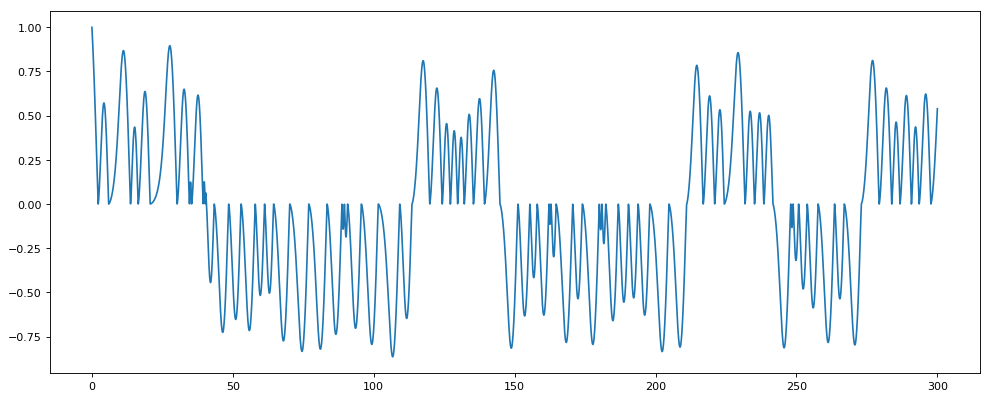

In [8]:
plt.figure(figsize=(15,6), dpi=80)
plt.plot(t,y[:,0])

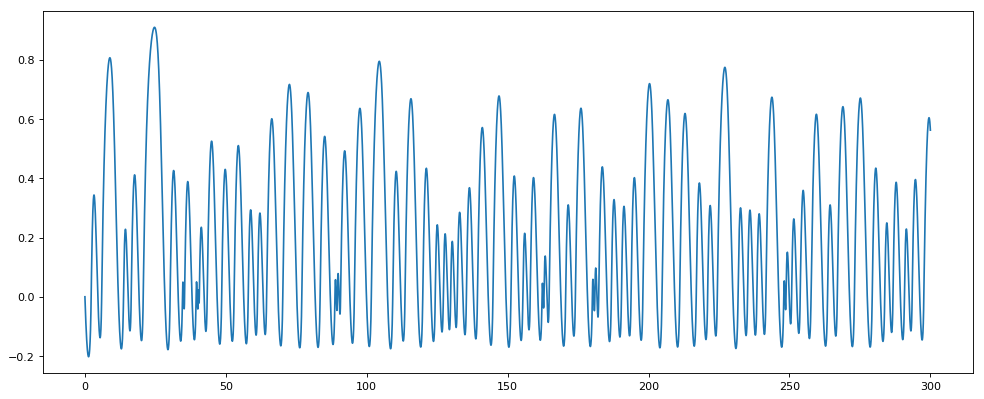

In [9]:
plt.figure(figsize=(15,6), dpi=80)
plt.plot(t, y[:,1])

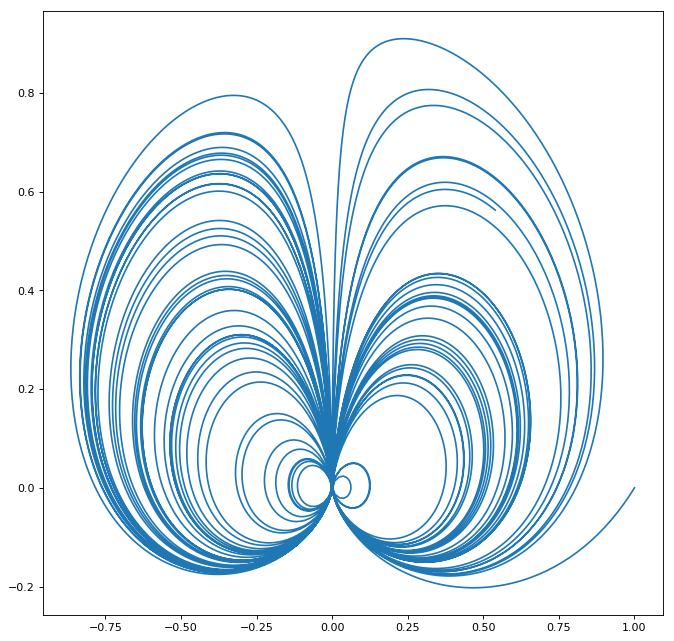

In [10]:
plt.figure(figsize=(10,10), dpi=80)
plt.plot(y[:,0], y[:,1])

Is this chaos? One way we might check would be to make a small change in initial conditions, and observe if the solution exhibits sensitive dependence, i.e. if it diverges rapidly from the solution seen with the original conditions.

In [11]:
y2 = odeint(deriv, y0=(1,0.000000000001), t=t)

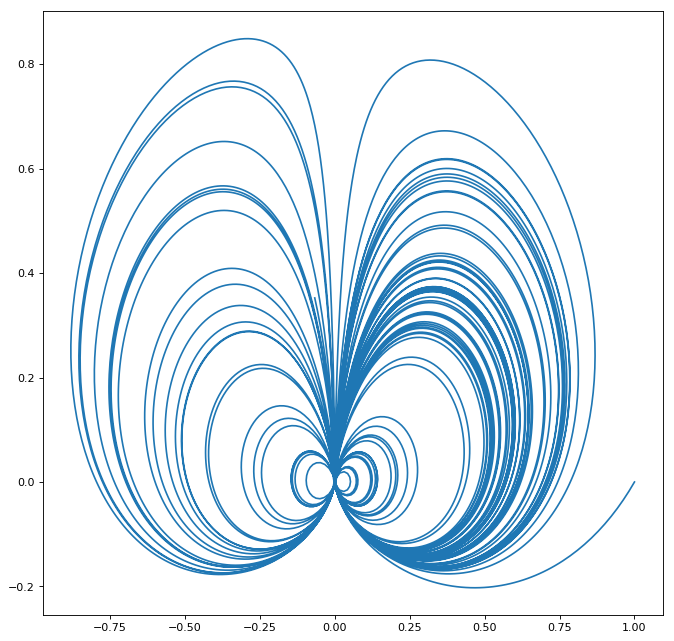

In [12]:
plt.figure(figsize=(10,10), dpi=80)
plt.plot(y2[:,0], y2[:,1])

That's pretty obviously different, even though we only changed the starting `y` value by $10^{-9}$, or 1 billionth. Let's overlay the time-series plots, and we'll only plot the first 50 seconds:

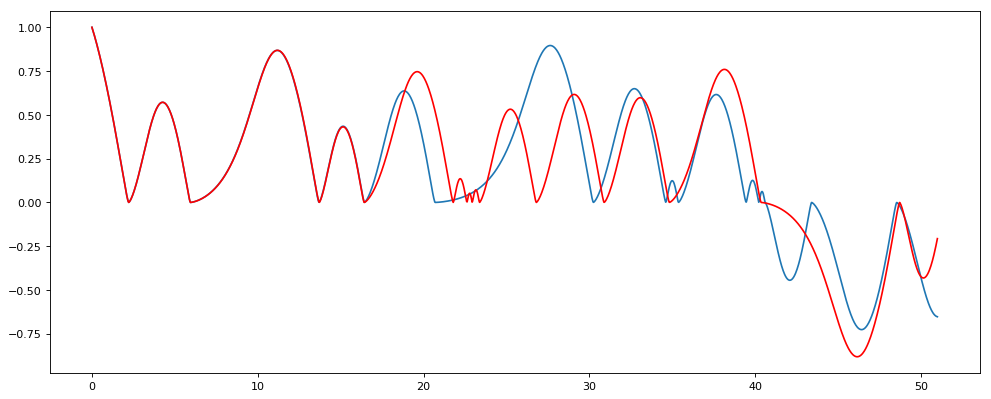

In [13]:
plt.figure(figsize=(15,6), dpi=80)
plt.plot(t[0:1700],y[0:1700,0])
plt.plot(t[0:1700],y2[0:1700,0],color='red')

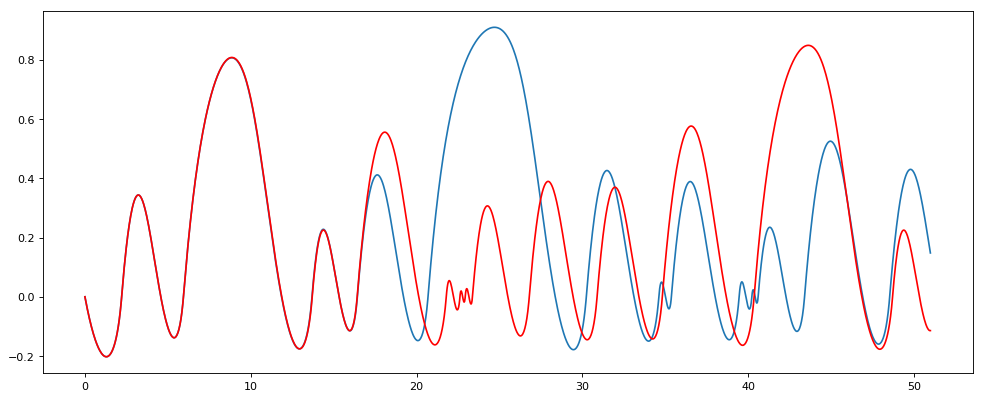

In [14]:
plt.figure(figsize=(15,6), dpi=80)
plt.plot(t[0:1700],y[0:1700,1])
plt.plot(t[0:1700],y2[0:1700,1],color='red')

Sure looks like chaos doesn't it. Have we discovered a true mathematical paradox?

Here's another example, which we can get by transforming the equations for a harmonic oscillator such that all of the solutions intersect at the origin:
$$\dot{x} = y$$
$$\dot{y} = \frac{y^2 - x^2}{2 x}$$

In [15]:
def deriv_ho(z,t):
    (x,y) = z
    return (y + rand.random()*0.0000000001, (y**2 - x**2)/(2*x) + rand.random()*0.000000001)

Note: in order to see the interesting behavior, we added a slight amount of noise. The numerical integrator actually manages to overcome the singularity in these equations without a bit of added randomness. However, unlike the first example, the transformed harmonic oscillator is unbounded, so you may get strange results due to numerical error. If that happens, just re-run the cell below (or reload the notebook if you're using nbviewer).

C:\Users\daved\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


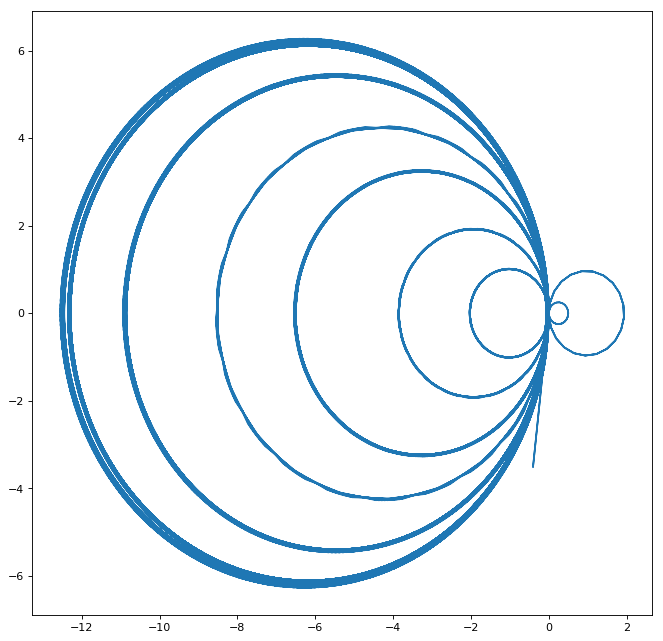

In [20]:
t2 = np.linspace(0, 3000, 10000)
y3 = odeint(deriv_ho, y0=(0.5,0), t=t2)
plt.figure(figsize=(10,10), dpi=80)
plt.plot(y3[:,0], y3[:,1])